___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 



## Get the Data
First we need to start with the proper imports, which we've already laid out for you here.
### The Imports

Already filled out for you.

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol.



In [3]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [4]:
#Bank of America
BAC = yf.download('BAC',start,end)
#CitiGroup
C = yf.download("C",start,end)
#Goldman Sachs
GS = yf.download("GS",start,end)
#JPMorgan Chase
JPM = yf.download("JPM",start,end)
# Morgan Stanley
MS = yf.download("MS",start, end)
# Wells Fargo
WFC = yf.download("WFC",start, end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

**Concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [6]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis = 1,keys = tickers,)

** Set the column name levels (this is filled out for you):**

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [8]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  31.544912  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.209887  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  31.250097  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  31.203180  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  31.223289  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  32.661312  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  32.683723  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  32.773327  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  32.806953  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  33.154228  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  18.979549  11016400  
2006-01-04   31.530001  18.759415  10870000  
2006-01-05   31.495001  18.738592  10158000  
2006-01-06   31.680000  18.848665   8403800  
2006-01-09   31.674999  18.845686   5619600  

[5 rows x 36 columns]

# EDA


** What is the max Close price for each bank's stock throughout the time period?**

In [9]:
bank_stocks.xs(key = 'Close',axis = 1,level = 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically.

In [10]:
returns1 = pd.DataFrame()

In [11]:
for tick in tickers:
    returns1[tick +' return'] = bank_stocks[tick]['Close'].pct_change()
returns1.head()

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

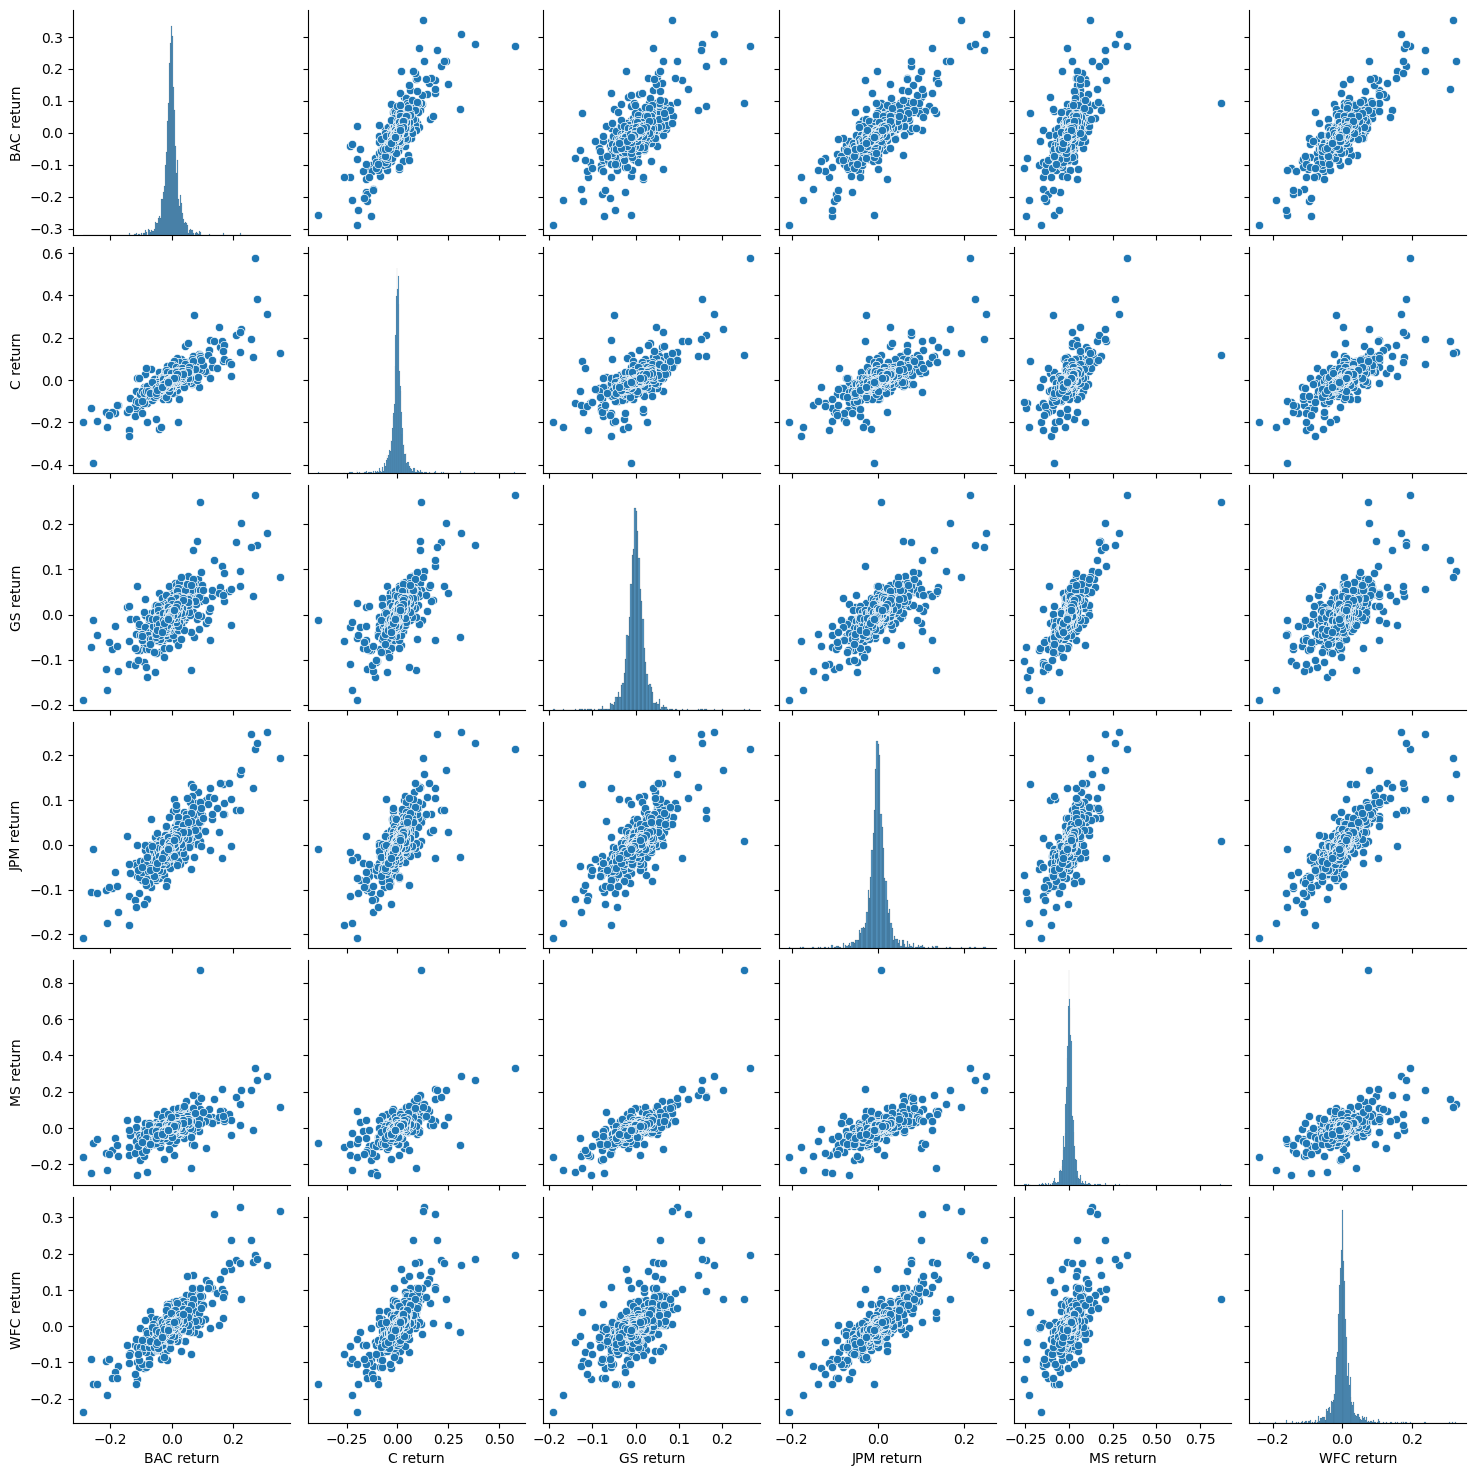

In [12]:
import seaborn as sns
sns.pairplot(returns1[1:])

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [13]:
returns1.idxmin()

BAC return   2009-01-20
C return     2009-02-27
GS return    2009-01-20
JPM return   2009-01-20
MS return    2008-10-09
WFC return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [14]:
returns1.idxmax()

BAC return   2009-04-09
C return     2008-11-24
GS return    2008-11-24
JPM return   2009-01-21
MS return    2008-10-13
WFC return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [15]:
returns1.std()

BAC return    0.036647
C return      0.038672
GS return     0.025390
JPM return    0.027667
MS return     0.037819
WFC return    0.030238
dtype: float64

In [16]:
returns1.loc['2015-01-01' : '2015-12-31' ].std()

BAC return    0.016163
C return      0.015289
GS return     0.014046
JPM return    0.014017
MS return     0.016249
WFC return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\MINH HOANG\AppData\Local\Temp\ipykernel_19404\1870366891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns1.loc['2015-01-01' : '2015-12-31']['MS return'],color = 'green',bins= 100)


Text(0.5, 1.0, 'Morgan Stanley in 2015')

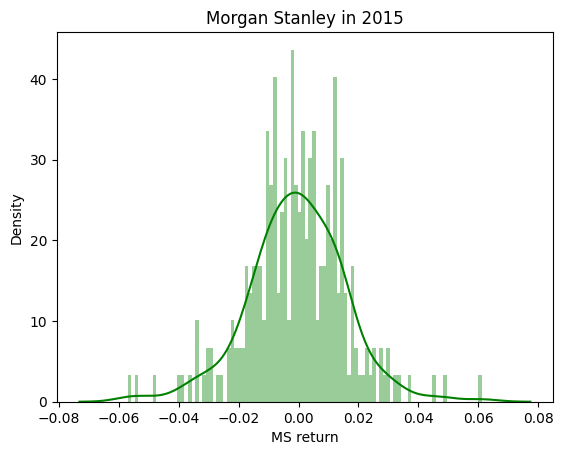

In [17]:
import matplotlib.pyplot as plt
sns.distplot(returns1.loc['2015-01-01' : '2015-12-31']['MS return'],color = 'green',bins= 100)
plt.title('Morgan Stanley in 2015')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\MINH HOANG\AppData\Local\Temp\ipykernel_19404\1094315963.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns1.loc['2008-01-01' : '2008-12-31']['C return'],color = 'red',bins= 100)


Text(0.5, 1.0, 'CitiGroup in 2008')

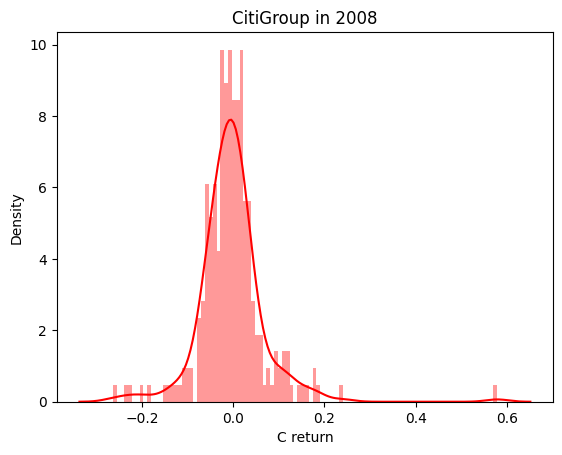

In [18]:
sns.distplot(returns1.loc['2008-01-01' : '2008-12-31']['C return'],color = 'red',bins= 100)
plt.title('CitiGroup in 2008')

____
# More Visualization



### Imports

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [20]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  31.544912  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.209887  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  31.250097  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  31.203180  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  31.223289  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  32.661312  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  32.683723  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  32.773327  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  32.806953  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  33.154228  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  18.979549  11016400  
2006-01-04   31.530001  18.759415  10870000  
2006-01-05   31.495001  18.738592  10158000  
2006-01-06   31.680000  18.848665   8403800  
2006-01-09   31.674999  18.845686   5619600  

[5 rows x 36 columns]

USING A FOR LOOP

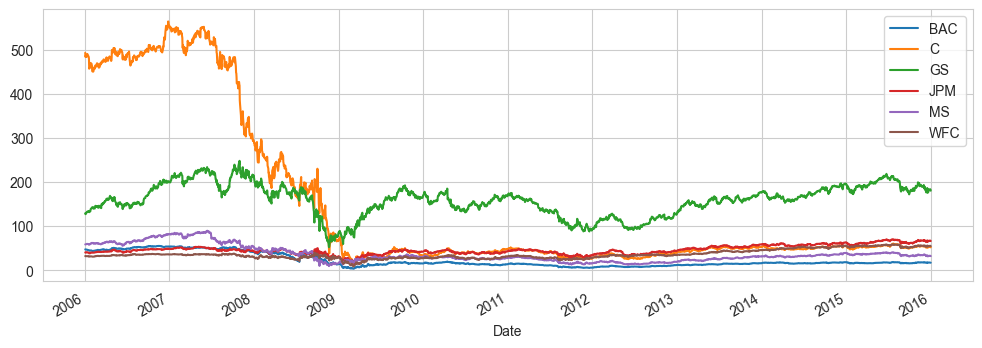

In [21]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize = (12,4),label = tick)
plt.legend(loc = 'upper right')

USING A XS() FUNCTION

<Axes: xlabel='Date'>

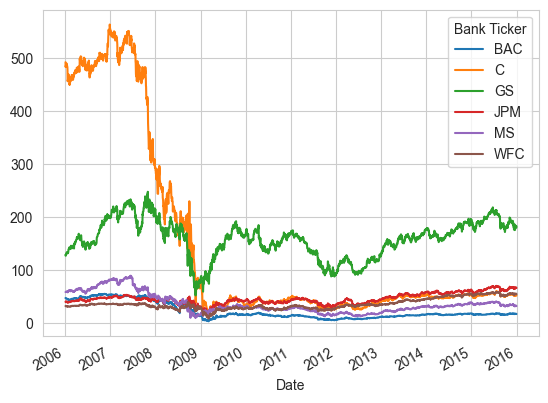

In [22]:
bank_stocks.xs('Close',axis = 1,level = 'Stock Info').plot()

## Moving Averages



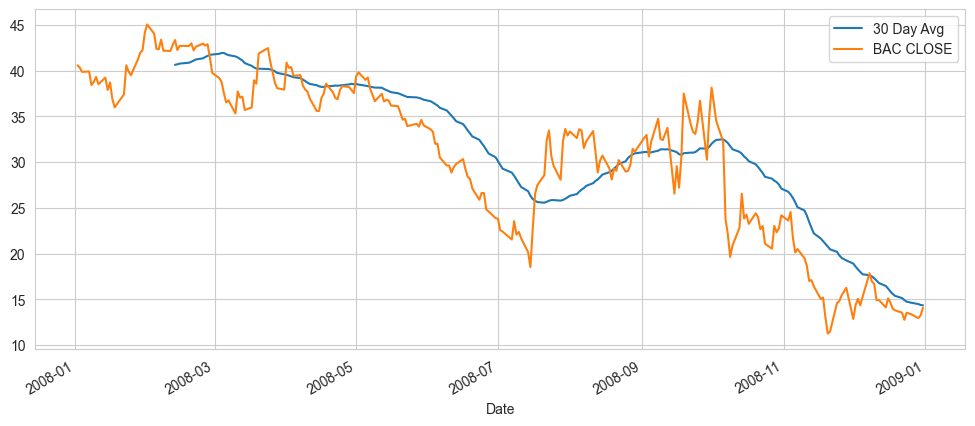

In [23]:
plt.figure(figsize = (12,5))
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window = 30).mean().plot(label = '30 Day Avg')
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(label = 'BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

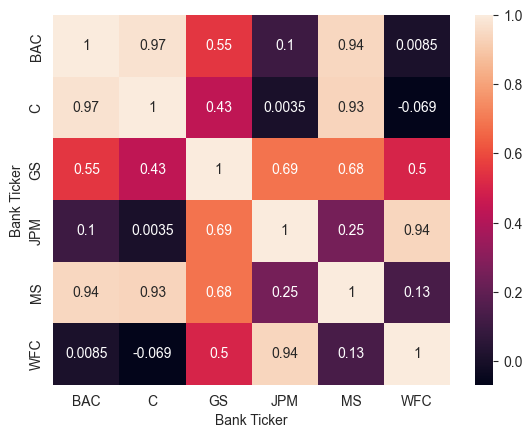

In [24]:
sns.heatmap(data=bank_stocks.xs('Close',axis= 1,level = 'Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

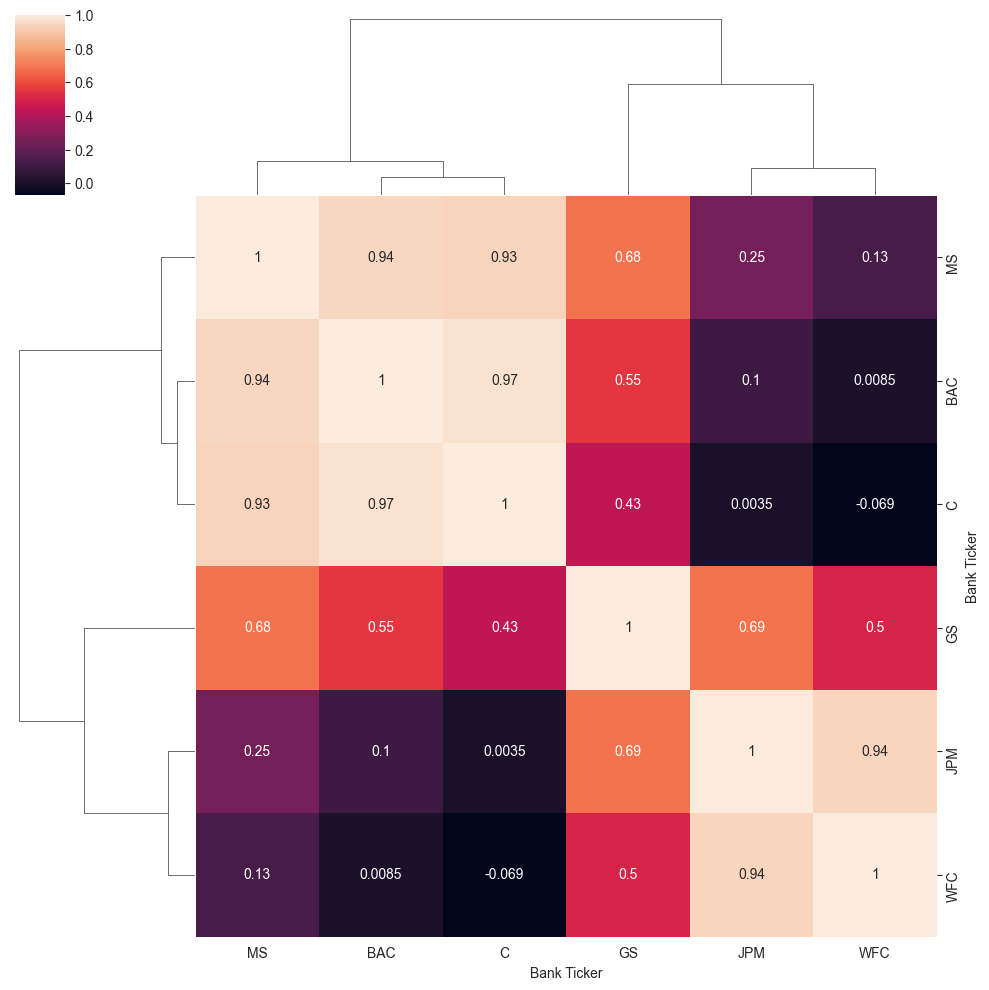

In [25]:
sns.clustermap(bank_stocks.xs('Close',axis = 1,level = 'Stock Info').corr(),annot = True)

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [26]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind = 'candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [27]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'sma',periods=[13,21,55],title='Simple Moving Averages')

c:\Users\MINH HOANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

c:\Users\MINH HOANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [28]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'boll')

c:\Users\MINH HOANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

